**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load dataset**

In [ ]:
data = pd.read_csv("credit_card_transactions_sample.csv")

**Checking data**

In [ ]:
# checking first 3 rows of dataset
data.head(3)

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,17852,8,CASH_IN,4891.21,C1309301031,52545.00,57436.21,C99219259,16208.50,11317.29,0.0,0.0
1,91055,10,CASH_IN,98779.04,C554280830,2789327.87,2888106.91,C1619402333,11066763.00,10967983.96,0.0,0.0
2,84629,10,CASH_IN,40748.83,C117445070,3067352.28,3108101.11,C229747691,1247595.22,1795986.72,0.0,0.0


In [ ]:
data.describe()

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,4815.000000,4815.000000,4.815000e+03,4.815000e+03,4.815000e+03,4.815000e+03,4.815000e+03,4815.000000,4815.0
mean,95777.645275,9.959294,1.842703e+05,8.861267e+05,9.055513e+05,9.175715e+05,1.155329e+06,0.000831,0.0
std,55939.676993,2.015005,3.402485e+05,2.756296e+06,2.800217e+06,2.226902e+06,2.491896e+06,0.028814,0.0
min,2.000000,1.000000,4.620000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,46690.000000,9.000000,1.170239e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,95839.000000,10.000000,6.933244e+04,1.828700e+04,0.000000e+00,5.118700e+04,1.289271e+05,0.000000,0.0
75%,144446.500000,11.000000,2.301092e+05,1.920846e+05,2.395718e+05,7.711193e+05,1.165361e+06,0.000000,0.0
max,192566.000000,13.000000,4.838196e+06,3.667630e+07,3.729746e+07,2.958454e+07,3.130692e+07,1.000000,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4815 non-null   int64  
 1   step            4815 non-null   int64  
 2   type            4815 non-null   object 
 3   amount          4815 non-null   float64
 4   nameOrig        4815 non-null   object 
 5   oldbalanceOrg   4815 non-null   float64
 6   newbalanceOrig  4815 non-null   float64
 7   nameDest        4815 non-null   object 
 8   oldbalanceDest  4815 non-null   float64
 9   newbalanceDest  4815 non-null   float64
 10  isFraud         4815 non-null   float64
 11  isFlaggedFraud  4815 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 451.5+ KB


In [ ]:
data.shape

(4815, 12)

**Missing value treatment**

In [ ]:
# missing value treatment
data.isnull().sum().any()

False

**Outlier detection**

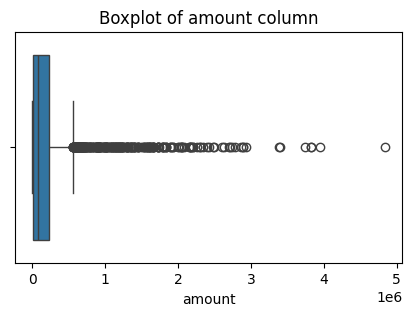

In [ ]:
# amount
plt.figure(figsize=(5,3))
sns.boxplot(x=data['amount'])
plt.xlabel('amount')
plt.title('Boxplot of amount column')
plt.show()

In [ ]:
print(f"1st percentile of amount: {np.percentile(data['amount'], 1)}")
print(f"25th percentile of amount: {np.percentile(data['amount'], 25)}")
print(f"50th percentile of amount: {np.percentile(data['amount'], 50)}")
print(f"90th percentile of amount: {np.percentile(data['amount'], 90)}")
print(f"99th percentile of amount: {np.percentile(data['amount'], 99)}")

1st percentile of amount: 415.323
25th percentile of amount: 11702.39
50th percentile of amount: 69332.44
90th percentile of amount: 420366.80400000047
99th percentile of amount: 1798971.4825999998


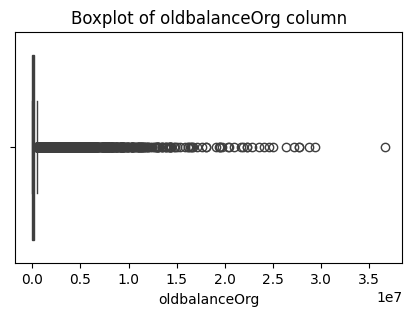

In [ ]:
# oldbalanceOrg
plt.figure(figsize=(5,3))
sns.boxplot(x=data['oldbalanceOrg'])
plt.xlabel('oldbalanceOrg')
plt.title('Boxplot of oldbalanceOrg column')
plt.show()

**EDA**

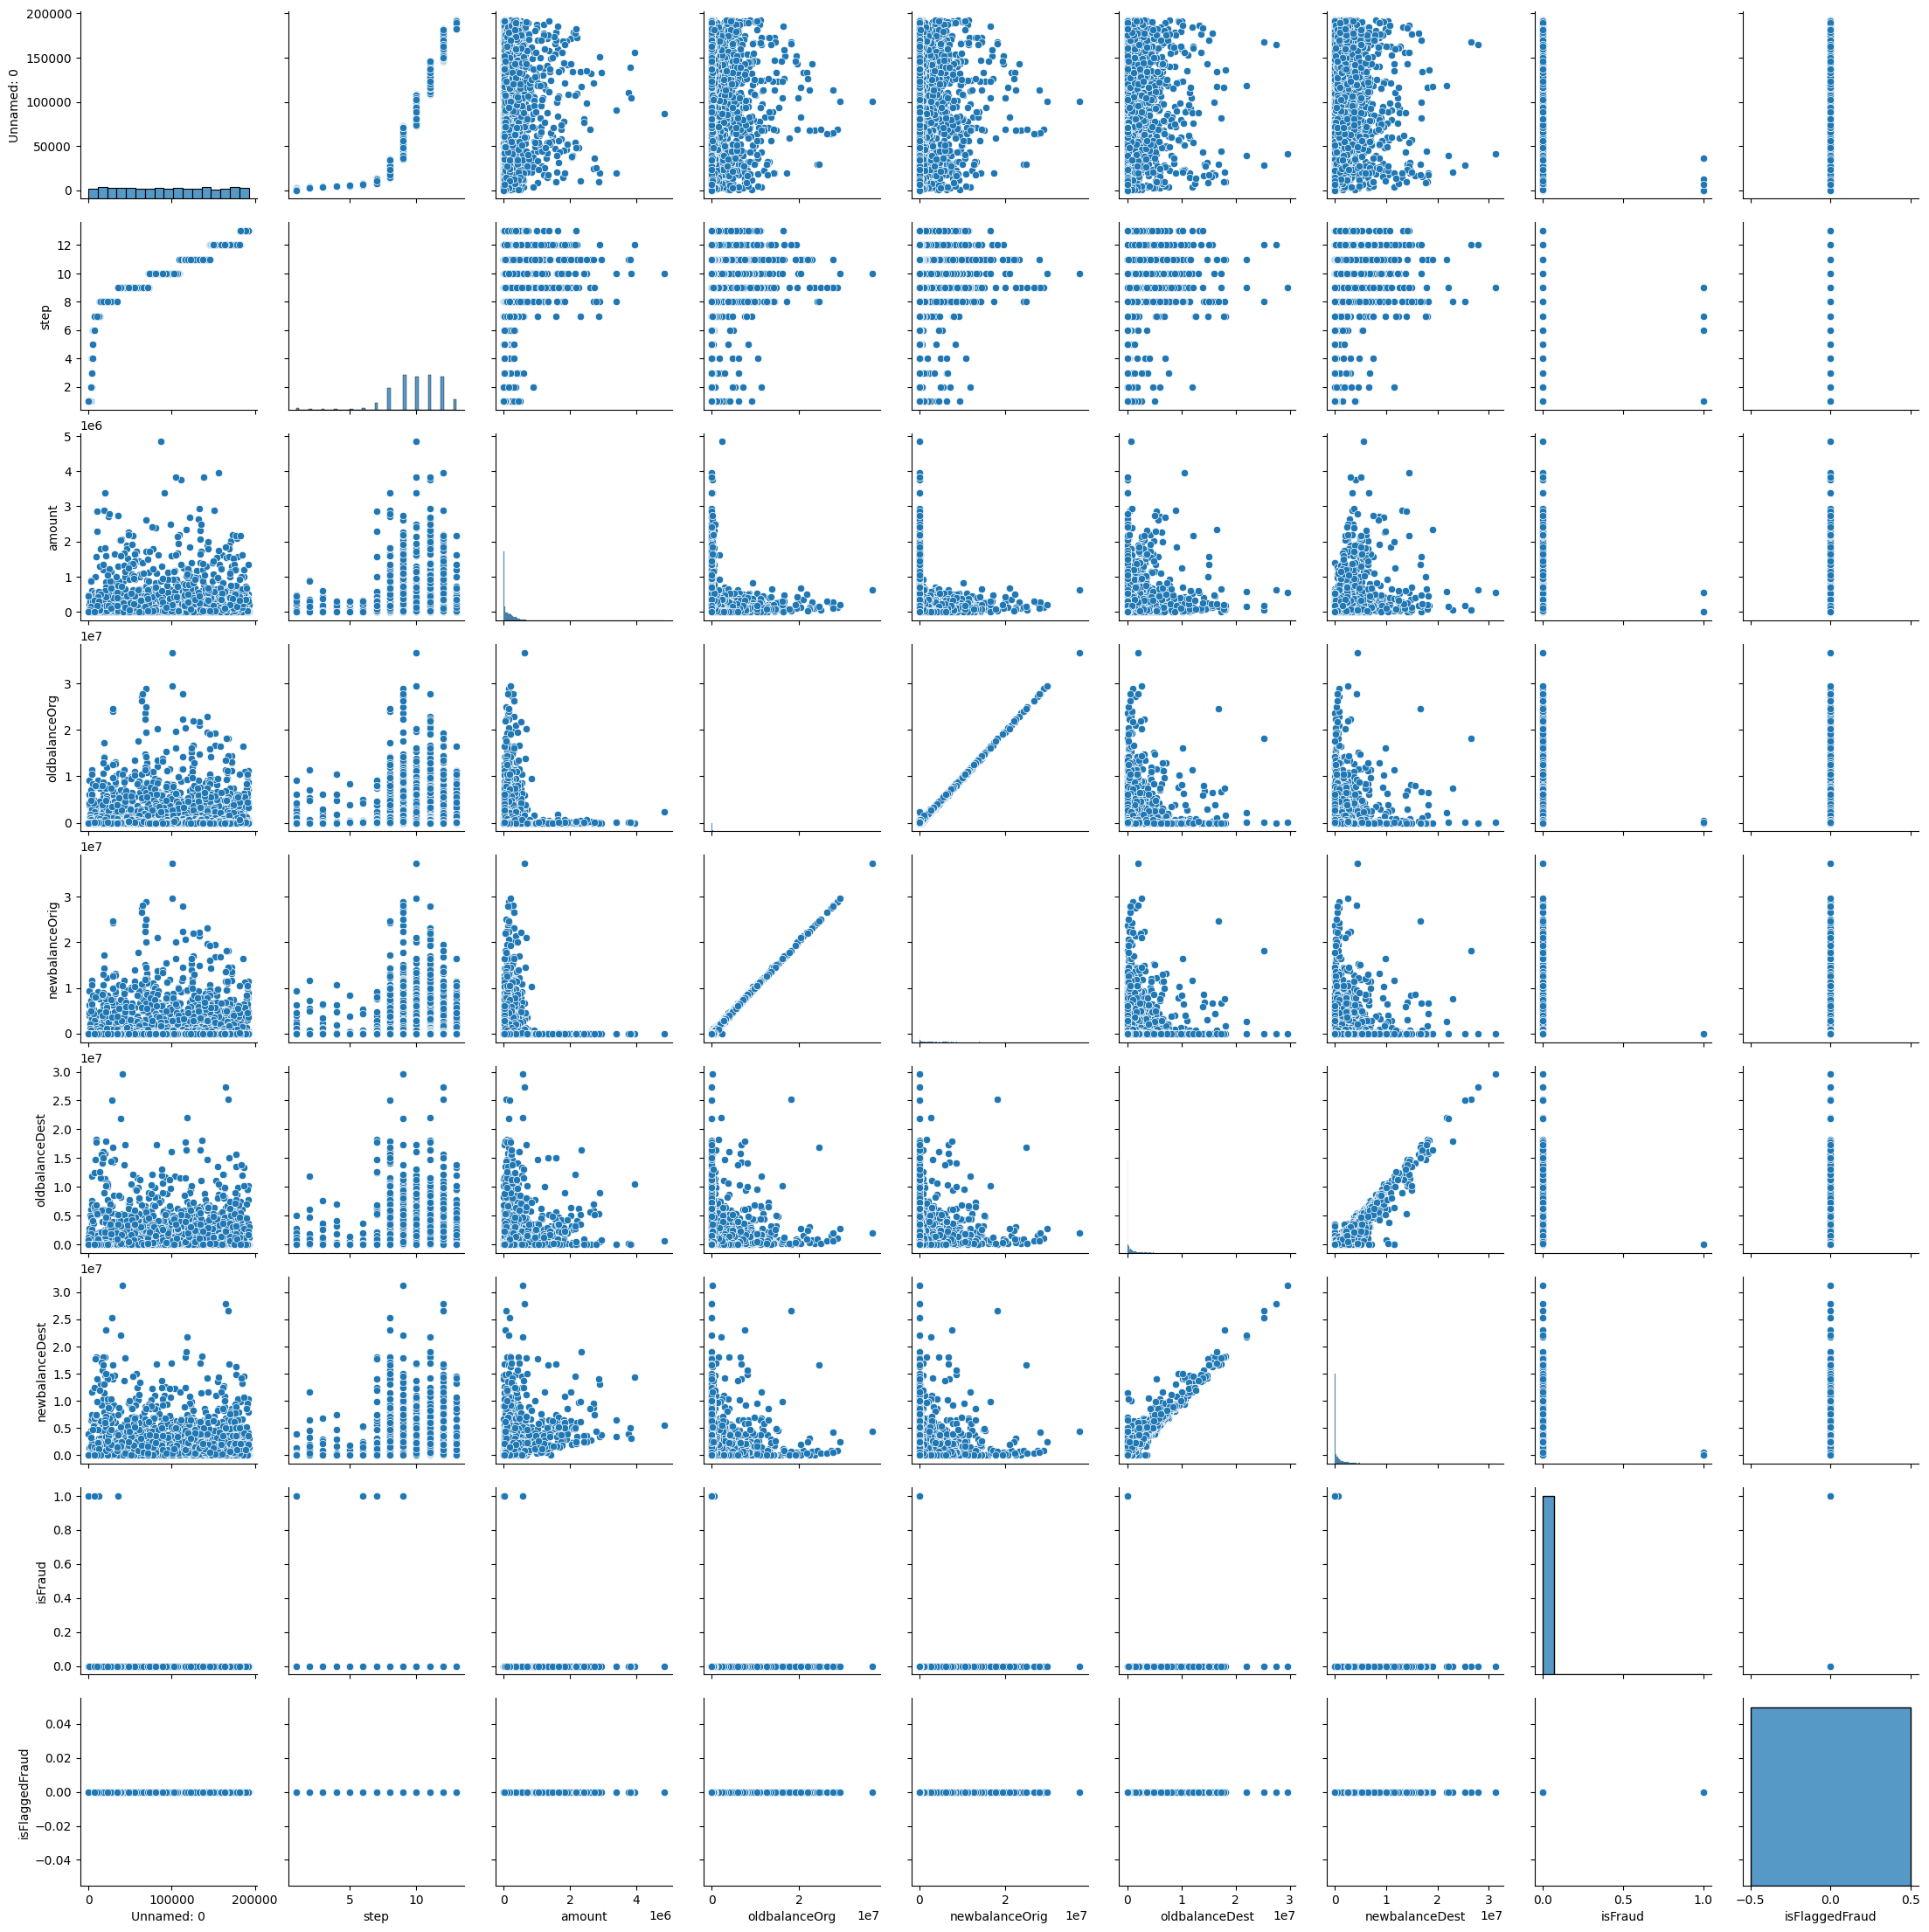

In [ ]:
sns.pairplot(data=data)
plt.show()

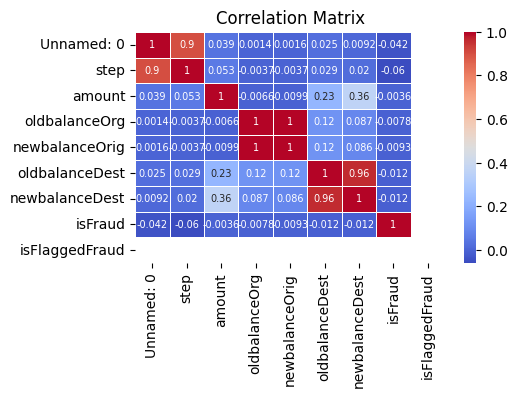

In [ ]:
corr_matrix = data.select_dtypes(include='number').corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.groupby(['type', 'isFraud']).size()

type      isFraud
CASH_IN   0.0         998
CASH_OUT  0.0        1596
          1.0           2
DEBIT     0.0          41
PAYMENT   0.0        1774
TRANSFER  0.0         402
          1.0           2
dtype: int64

Insights: Only CASH_OUT and TRANSFER trasactions types have fraud transactions.

In [ ]:
perc_fraud = round(len(data[data['isFraud'] == 1]) / len(data) * 100, 2)
perc_legit = round(len(data[data['isFraud'] == 0]) / len(data) * 100, 2)
print(f"percentage of fraud transactions: {perc_fraud}")
print(f"percentage of legit transactions: {perc_legit}")

percentage of fraud transactions: 0.08
percentage of legit transactions: 99.92


Insights: Only less than 0.1% transactions are fraud.

In [ ]:
perc_fraud_cash_in = round(len(data[(data['isFraud'] == 1) & (data['type'] == 'CASH_IN')]) / len(data) * 100, 2)
perc_fraud_cash_out = round(len(data[(data['isFraud'] == 1) & (data['type'] == 'CASH_OUT')]) / len(data) * 100, 2)
perc_fraud_payment = round(len(data[(data['isFraud'] == 1) & (data['type'] == 'PAYMENT')]) / len(data) * 100, 2)
perc_fraud_transfer = round(len(data[(data['isFraud'] == 1) & (data['type'] == 'TRANSFER')]) / len(data) * 100, 2)
perc_fraud_debit = round(len(data[(data['isFraud'] == 1) & (data['type'] == 'DEBI')]) / len(data) * 100, 2)

print(f"percentage of cash-in fraud transactions: {perc_fraud_cash_in}")
print(f"percentage of cash-out fraud transactions: {perc_fraud_cash_out}")
print(f"percentage of payment fraud transactions: {perc_fraud_payment}")
print(f"percentage of transfer fraud transactions: {perc_fraud_transfer}")
print(f"percentage of debit fraud transactions: {perc_fraud_debit}")

percentage of cash-in fraud transactions: 0.0
percentage of cash-out fraud transactions: 0.04
percentage of payment fraud transactions: 0.0
percentage of transfer fraud transactions: 0.04
percentage of debit fraud transactions: 0.0


Insights: Only cash-out and transfer payment methods have fraud transactions.

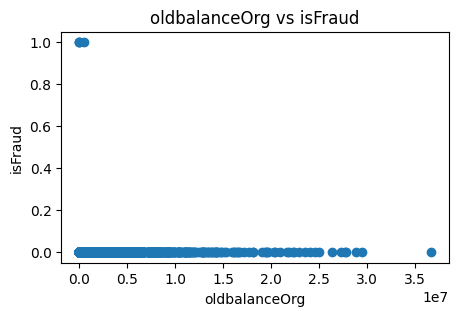

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(data=data, x='oldbalanceOrg', y='isFraud')
plt.xlabel('oldbalanceOrg')
plt.ylabel('isFraud')
plt.title('oldbalanceOrg vs isFraud')
plt.show()

Insights: Surprisingly scammers targeting once with low account balance to others

Insight: In all fraud transactions scammers emptied victims accounts.

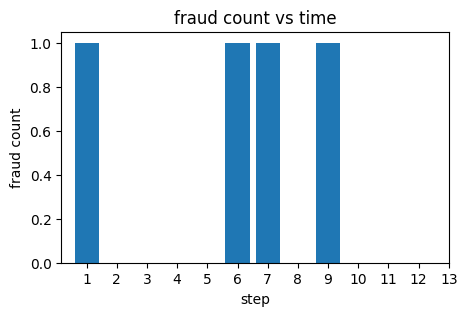

In [ ]:
fraud_data = data[data['isFraud'] == 1]
steps = sorted(data['step'].unique())

plt.figure(figsize=(5,3))
plt.bar(x=fraud_data['step'], height=fraud_count)
plt.xticks(ticks=range(1, max(steps) + 1), labels=range(1, max(steps) + 1))
plt.xlabel('step')
plt.ylabel('fraud count')
plt.title('fraud count vs time')
plt.show()

Insights: Scammers choosing time 1am to 9am. May be because it is non-banking hours and customers don't notice unsual activities in this time becasue they are resting.